___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

## Imports


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


## Get the Data and Understand it

In [43]:
df = pd.read_csv('Ecommerce Customers')

In [44]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [46]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

In [47]:
#sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

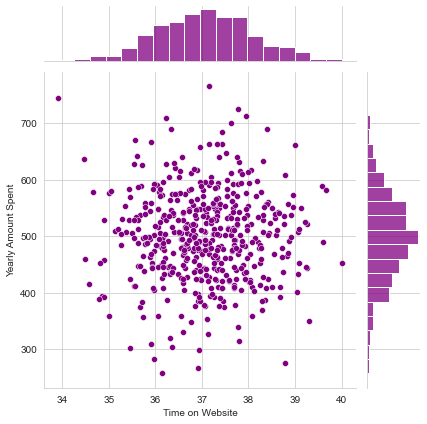

In [48]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df, color='purple')

**Time on App column**

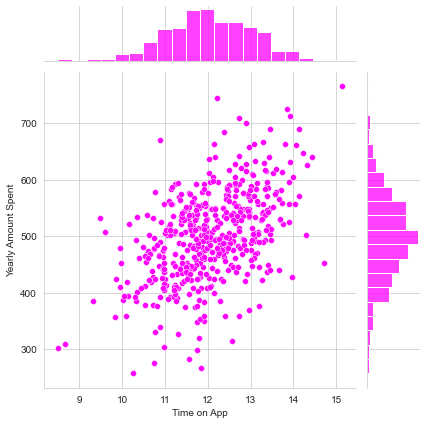

In [49]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df, color='magenta')

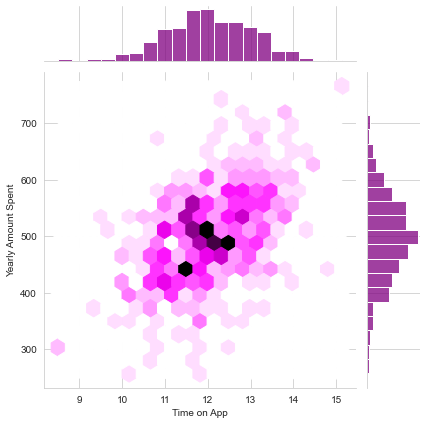

In [50]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df, kind='hex', color='purple')

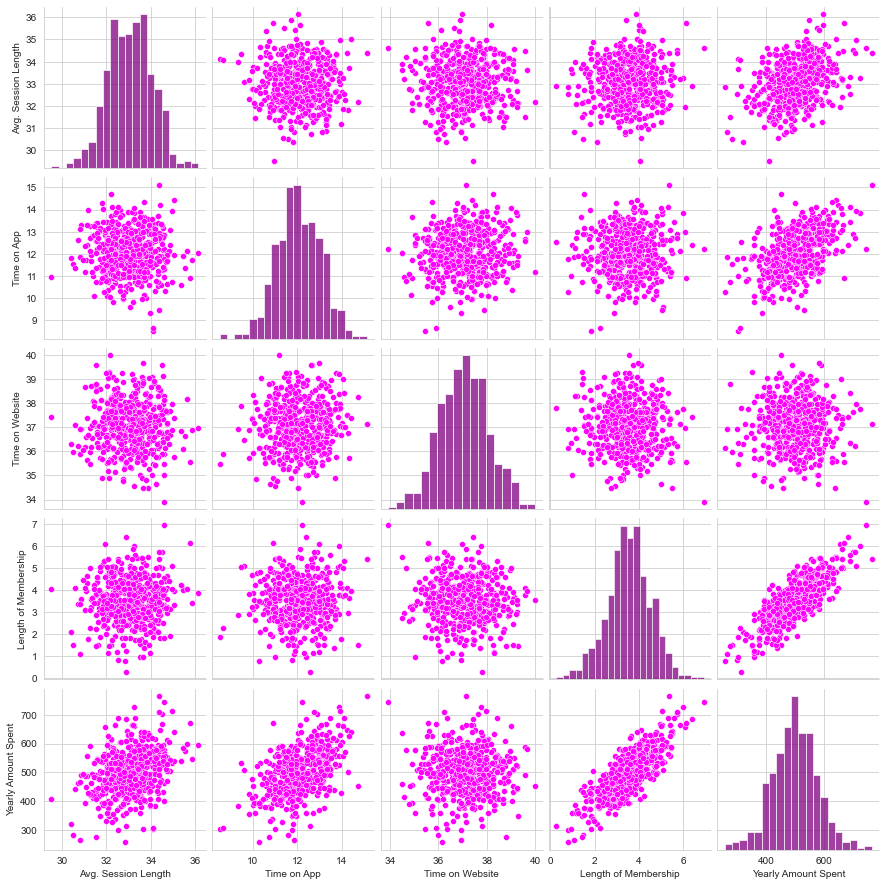

In [79]:

sns.pairplot(df, plot_kws={'color': 'magenta'}, diag_kws={'color': 'purple'})

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

## Length of membership is the most correlated feature with Yearly Amount Spent

<AxesSubplot:>

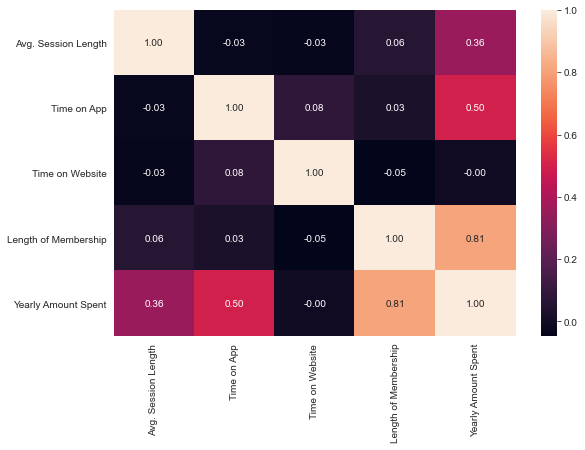

In [85]:
#usings a heatmat to confirm this
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(),annot=True,ax=ax, fmt='.2f', color='purple')

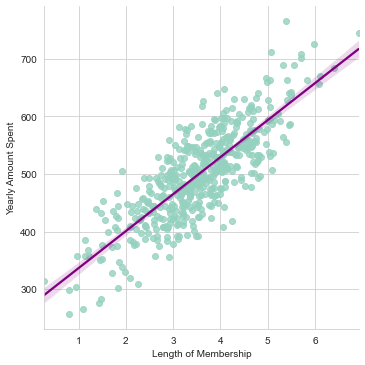

In [90]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df, line_kws={'color': 'purple'}, palette={'color': 'purple'})

## Training and Testing Data


In [54]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [55]:
y = df['Yearly Amount Spent']
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [58]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [59]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [60]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [61]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

In [62]:
predictions = lm.predict( X_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

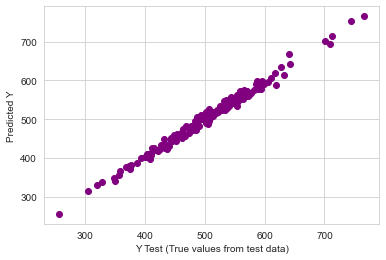

In [63]:
plt.scatter(y_test,predictions, color='purple')
plt.xlabel('Y Test (True values from test data)')
plt.ylabel('Predicted Y')

## Evaluating the Model

Evaluating the model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [64]:
from sklearn import metrics 
# or use show_scores(pass the model)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))


MAE: 7.228148653430815


In [65]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))


MSE: 79.81305165097429


In [66]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 8.933815066978624


## Residuals

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\Users\Diana Mutheu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


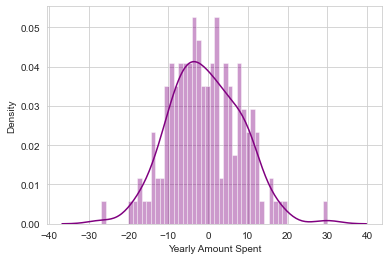

In [67]:
sns.distplot((y_test-predictions),bins=50,color='purple');

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

**Recreate the dataframe below.**

In [68]:
#numeric columns and their coeffs
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

Answering our problem question.
Do you think the company should focus more on their mobile app or on their website?**

#### I think the company should focus more on their mobile app to retain its better performance, if possible, they could also build on the website to catch up to the mobile app performance(this all depends on the amount of money the company is willing to put into improving performance, they could either choose both or leave one), however, I feel like the focus should be mostly on the length of membership since it's the mostly correlated feature to the amount spent on the ecommerce company.